In [1]:
# Import the neccessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyRegressor
from sklearn.feature_selection import f_regression

import scipy.stats as ss
from scipy.stats import chi2_contingency, chi2

# Preprocessing

In [2]:
# Downlaod the data
df = pd.read_csv('cleaned vehicles data1.csv')
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,...,type,paint_color,price_kbb,mpg,rating,year_kbb,year_difference,new_price,depreciation,depreciation per year
0,8995.0,2011,chevrolet,traverse,good,6 cylinders,gas,178054.0,clean,automatic,...,SUV,white,30995.0,21.0,4.3,2021,10,25426.696,0.646238,0.098696
1,10995.0,2014,ford,explorer,good,6 cylinders,gas,170259.0,clean,automatic,...,SUV,white,33470.0,24.0,4.1,2021,7,29137.649,0.622653,0.129970
2,10995.0,2014,ford,explorer,good,6 cylinders,gas,170259.0,clean,automatic,...,SUV,white,51100.0,27.0,4.1,2021,7,44485.625,0.752842,0.181003
3,12984.0,2016,nissan,rogue,excellent,4 cylinders,gas,86942.0,clean,automatic,...,SUV,blue,26745.0,30.0,4.7,2021,5,24223.771,0.463998,0.117259
4,12984.0,2016,nissan,rogue,excellent,4 cylinders,gas,86942.0,clean,automatic,...,SUV,blue,28795.0,34.0,4.3,2019,3,27134.172,0.521489,0.217837


In [3]:
df.shape

(10938, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10938 entries, 0 to 10937
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  10938 non-null  float64
 1   year                   10938 non-null  int64  
 2   manufacturer           10938 non-null  object 
 3   model                  10938 non-null  object 
 4   condition              10938 non-null  object 
 5   cylinders              10938 non-null  object 
 6   fuel                   10938 non-null  object 
 7   odometer               10938 non-null  float64
 8   title_status           10938 non-null  object 
 9   transmission           10938 non-null  object 
 10  drive                  10938 non-null  object 
 11  size                   10938 non-null  object 
 12  type                   10938 non-null  object 
 13  paint_color            10938 non-null  object 
 14  price_kbb              10938 non-null  float64
 15  mp

In [5]:
#check deprecition per year not to exceed 100%
df['depreciation per year'].max()

0.9803859412493792

In [70]:
df['depreciation per year'].min()

-0.034883758913167195

In [ ]:
# The negitive sight indicate that the car is sold more than it was bought
# such as antique cars

In [6]:
df.shape

(10938, 22)

In [7]:
# Extract numerical data type features using pandas select_dtype method.
numerical = df.select_dtypes(include=['int64', 'float64'],exclude=['object'])
numerical.columns

Index(['price', 'year', 'odometer', 'price_kbb', 'mpg', 'rating', 'year_kbb',
       'year_difference', 'new_price', 'depreciation',
       'depreciation per year'],
      dtype='object')

In [8]:
# select the features with object data types
categorical_mask = (df.dtypes==object)

In [16]:
#get the features by indexing the mask index
categorical_columns = df.columns[categorical_mask]
categorical_columns

Index(['manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color'],
      dtype='object')

In [10]:
# Drop missing values using dropna() method
df1 = df.dropna()

In [11]:
# Display the title of the categorical variabels uisng head() method
df1[categorical_columns].head()

,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color
0,chevrolet,traverse,good,6 cylinders,gas,clean,automatic,4wd,full-size,SUV,white
1,ford,explorer,good,6 cylinders,gas,clean,automatic,4wd,full-size,SUV,white
2,ford,explorer,good,6 cylinders,gas,clean,automatic,4wd,full-size,SUV,white
3,nissan,rogue,excellent,4 cylinders,gas,clean,automatic,4wd,mid-size,SUV,blue
4,nissan,rogue,excellent,4 cylinders,gas,clean,automatic,4wd,mid-size,SUV,blue


In [12]:
# Check missing value
df1.isnull().sum()

price                    0
year                     0
manufacturer             0
model                    0
condition                0
cylinders                0
fuel                     0
odometer                 0
title_status             0
transmission             0
drive                    0
size                     0
type                     0
paint_color              0
price_kbb                0
mpg                      0
rating                   0
year_kbb                 0
year_difference          0
new_price                0
depreciation             0
depreciation per year    0
dtype: int64

In [13]:
# Drop 'depreciation' column from the data frame
df1.drop(columns=['depreciation'], inplace=True)

In [14]:
# The dimension of hte data frame 
df1.shape

(10938, 21)

In [15]:
# import LabelEncoder from sklaern preprocessing to change the category variabels
# by labeled integer.
from sklearn.preprocessing import LabelEncoder

In [19]:
# instantiate labelEncoder function
le = LabelEncoder()

In [20]:
# check df1 values before converted to integers or discrite number.
df1.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,...,size,type,paint_color,price_kbb,mpg,rating,year_kbb,year_difference,new_price,depreciation per year
0,8995.0,2011,chevrolet,traverse,good,6 cylinders,gas,178054.0,clean,automatic,...,full-size,SUV,white,30995.0,21.0,4.3,2021,10,25426.696,0.098696
1,10995.0,2014,ford,explorer,good,6 cylinders,gas,170259.0,clean,automatic,...,full-size,SUV,white,33470.0,24.0,4.1,2021,7,29137.649,0.129970
2,10995.0,2014,ford,explorer,good,6 cylinders,gas,170259.0,clean,automatic,...,full-size,SUV,white,51100.0,27.0,4.1,2021,7,44485.625,0.181003
3,12984.0,2016,nissan,rogue,excellent,4 cylinders,gas,86942.0,clean,automatic,...,mid-size,SUV,blue,26745.0,30.0,4.7,2021,5,24223.771,0.117259
4,12984.0,2016,nissan,rogue,excellent,4 cylinders,gas,86942.0,clean,automatic,...,mid-size,SUV,blue,28795.0,34.0,4.3,2019,3,27134.172,0.217837


In [21]:
# Using the vectorizor apply method to transform labelled encoder on categorical variables
df_1 = df1[categorical_columns].apply(lambda x : le.fit_transform(x))

In [22]:
# check the output, each unique value assiged with a discrate or an integers accordingly.  
df_1.hea

,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color
0,5,142,2,4,2,0,0,0,1,0,10
1,9,51,2,4,2,0,0,0,1,0,10
2,9,51,2,4,2,0,0,0,1,0,10
3,20,121,0,2,2,0,0,0,2,0,1
4,20,121,0,2,2,0,0,0,2,0,1


In [23]:
# Remove duplication
df1 = df1.drop(columns=categorical_columns, axis=1)
# merge both the categorical encoder features with numerical features
df2 = pd.concat([df_1,df1], axis=1) 

In [24]:
df2.head()

,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,...,price,year,odometer,price_kbb,mpg,rating,year_kbb,year_difference,new_price,depreciation per year
0,5,142,2,4,2,0,0,0,1,0,...,8995.0,2011,178054.0,30995.0,21.0,4.3,2021,10,25426.696,0.098696
1,9,51,2,4,2,0,0,0,1,0,...,10995.0,2014,170259.0,33470.0,24.0,4.1,2021,7,29137.649,0.129970
2,9,51,2,4,2,0,0,0,1,0,...,10995.0,2014,170259.0,51100.0,27.0,4.1,2021,7,44485.625,0.181003
3,20,121,0,2,2,0,0,0,2,0,...,12984.0,2016,86942.0,26745.0,30.0,4.7,2021,5,24223.771,0.117259
4,20,121,0,2,2,0,0,0,2,0,...,12984.0,2016,86942.0,28795.0,34.0,4.3,2019,3,27134.172,0.217837


In [25]:
df2.shape

(10938, 21)

In [26]:
# function to get correlation between categorical features

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [27]:
#this function is used for correlation between categorical (non-binomial) and numerical features
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

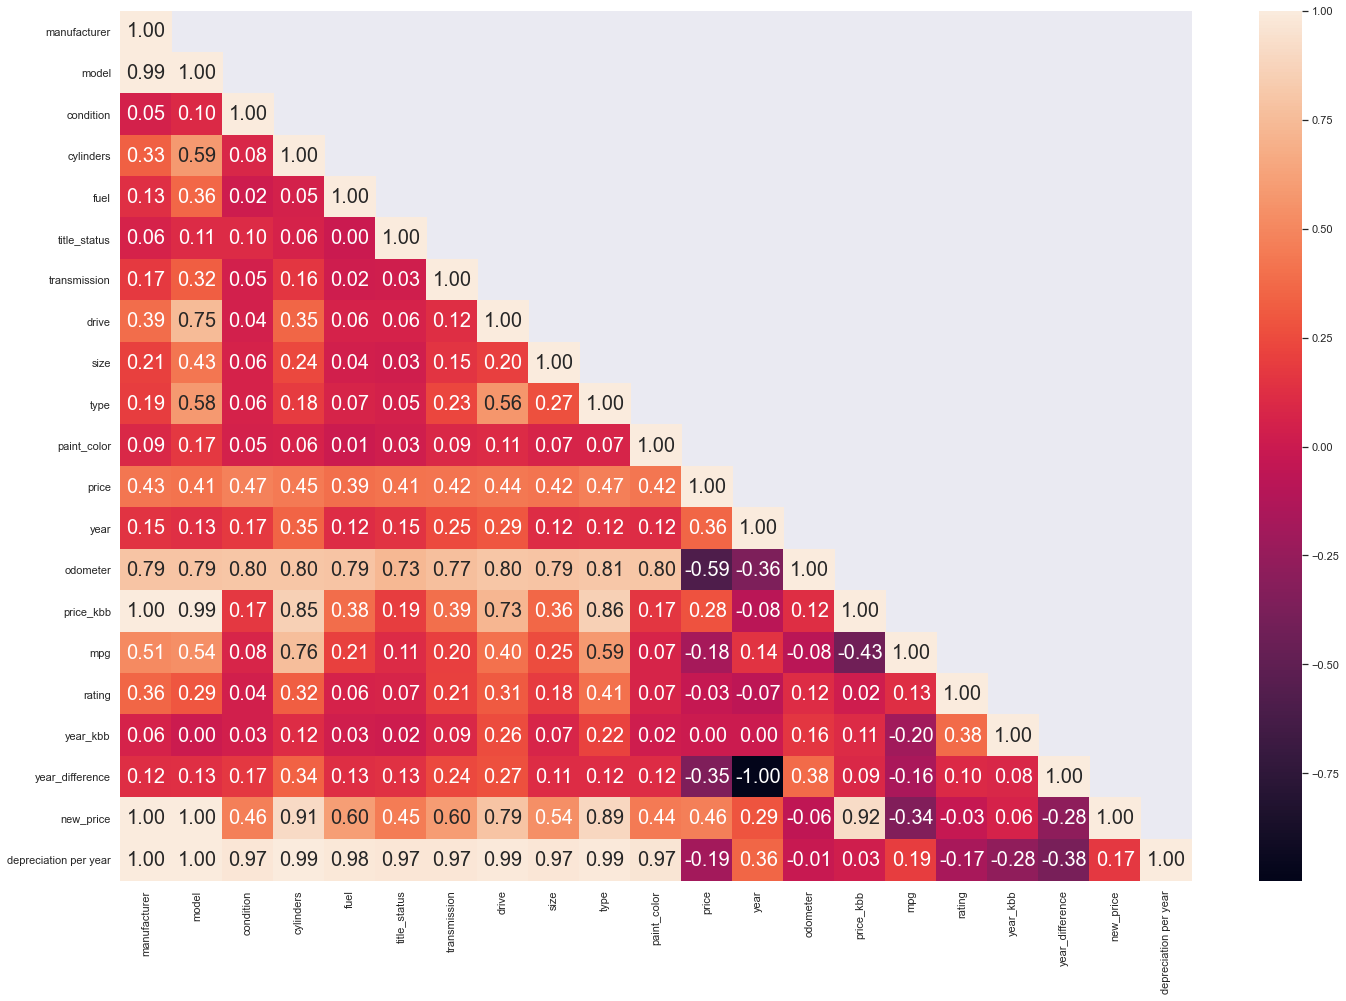

In [71]:
columns = df2.columns
corr = pd.DataFrame(index= columns, columns=columns)

for i in range(len(columns)):
    for j in range(i, len(columns)):
        
        if (i==j): #correlation to its slef is one
            r = 1
        
        if (columns[i] in categorical_columns) & (columns[j] in categorical_columns):
            r = cramers_v(df2[columns[j]], df2[columns[i]])
        
         
        elif (columns[i] in categorical_columns) & (columns[j] in numerical):
            r = correlation_ratio(df2[columns[j]], df2[columns[i]])
            
        elif (columns[i] in numerical) & (columns[j] in categorical_columns):
            r = correlation_ratio(df2[columns[j]], df2[columns[i]])
            
        else:
            (columns[i] in numerical.columns) & (columns[j] in numerical.columns)
            r, p = ss.pearsonr(df2[columns[j]], df2[columns[i]])
        
            
                
        corr.loc[columns[j], columns[i]] = r 
            
corr.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(24,16))
sns.set(font_scale=1.2)
sns.set(rc={'figure.figsize':(20,16)})
sns.heatmap(corr,annot=True,fmt='.2f',annot_kws={"size": 20})
display()
        

# Train  and Test Split

In [29]:
# class the depedent target variable as 
# "y" and the indepedent features as "X"
y = df2['depreciation per year']
X = df2.drop(columns='depreciation per year', axis=1)

In [30]:
# Split the dataset into train and test using train_test_split 
# imported from sklearn.model_selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [31]:
X.columns

Index(['manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color',
       'price', 'year', 'odometer', 'price_kbb', 'mpg', 'rating', 'year_kbb',
       'year_difference', 'new_price'],
      dtype='object')

In [32]:
# Overview the dimension of train and test splitted data.
X_train.shape, X_test.shape

((7656, 20), (3282, 20))

In [33]:
# check the dimension of trains are equal in 'X' an 'y' and the same for test.
y_train.shape, y_test.shape

((7656,), (3282,))

In [34]:
# lets begin by the mean as predicator to start with as best guess
train_mean = y_train.mean()
train_mean

0.11983455998708774

In [35]:
# Dummy regressor return the same value 
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[0.11983456]])

In [36]:
# Function defination for the proportion of variance explaining or R_squared 
def r_squared(y, ypred):
    """R-squared score.  
    Calculate the R-squared, or coefficient of determination, of the input.    
    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    ybar = np.sum(y) / len(y) #yes, we could use np.mean(y)
    SST = np.sum((y - ybar)**2) #(total sum of squares error or SST
    #variance within the dataset from the mean).
    SSR = np.sum((y - ypred)**2) #(residual sum of squares error.
    # The variance of the expected and the predicted where, aiming to minimize the 
    # errors as possible).
    r2 = (SST - SSR) / SST
    return r2

In [37]:
# Broadcasting train_mean by multiplying ones vector instantiated by y_train dimension
y_tr_pred = train_mean * np.ones(len(y_train))
#overviw the output of the predicted but a number multiply by one is itself.
y_tr_pred[:5]

array([0.11983456, 0.11983456, 0.11983456, 0.11983456, 0.11983456])

In [38]:
# The same result achieved using dummyregressor predict.
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([0.11983456, 0.11983456, 0.11983456, 0.11983456, 0.11983456])

In [42]:
# Repreat for y_test multiply an array of once with a lenght of y
y_te_pred = train_mean * np.ones(len(y_test))
#print(y_test, y_te_pred[:2])

In [46]:
# argument positon is crutial y_test first and y_test_pred second position
r_squared(y_train, y_tr_pred), r_squared(y_test, y_te_pred)  #output no variance is explained 

(0.0, -0.000563758234612745)

In [47]:
#Calculate the Mean absolute errors(mae) as defined above
def mae(y, ypred):
    """Mean absolute error.
    Calculate the mean absolute error of the arguments
    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    abs_error = np.abs(y - ypred)#The difference of expected and predicted
    mae = np.mean(abs_error)# averaging the total erros
    return mae

In [48]:
mae(y_train, y_tr_pred)

0.043500159575291776

In [49]:
#Calculate the MSE as defined above
def mse(y, ypred):
    """Mean square error.
    Calculate the mean square error of the arguments
    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    sq_error = (y - ypred)**2  # Square errors or residual errors
    mse = np.mean(sq_error) # mean square errors
    return mse

In [50]:
# RMSE(root-mean-sequared error)
np.sqrt(mse(y_train, y_tr_pred))

0.07159268840948611

The training 'rmse' return higher variability than 'mae'

In [52]:
# RMSE for test dataset
np.sqrt(mse(y_test, y_te_pred))

0.06896725347922934

In [56]:
#Suprisingly, 'rmse' is slightly less in variability.

In [55]:
#Compare result with sklearn library R_square
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.0, -0.0005637582346127434)

sklearn R_square and r_square functon return the same result in both train and 
test datasets. 


In [58]:
# Using sklearn libarary mean_squard_error is equal both in training and test dataset outcomes versuls 'mse' function.
np.sqrt(mean_squared_error(y_train, y_tr_pred)),np.sqrt(mean_squared_error(y_test, y_te_pred))

(0.07159268840948609, 0.0689672534792293)

# Scale the data 

In [59]:
# Scale and transform the data 
scaler = StandardScaler()
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)
X_te_scaled = scaler.transform(X_test)

In [60]:
# Apply linearRegression model and fit the X_tr_scaled.
lm = LinearRegression()
lm.fit(X_tr_scaled, y_train)

LinearRegression()

In [61]:
# Make perdictions using the model on both train and test splits 
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [62]:
# Assess Model Performance
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.4595433832799377, 0.483097828379647)

In [ ]:
# R-squared from linear-regressor is very low.

In [51]:
#compare the result sklearn library and funtioned defined above.
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(0.028382263767620243, 0.027868648599213793)

In [ ]:
# Scaled dataset-Mean absolute error from LinearRegressor return 2.79% which minimized the variation than unscaled
# DummeyRegressor 

In [63]:
# mean-squared-error from scaled dataset minimize the error
np.sqrt(mean_squared_error(y_train, y_tr_pred)), np.sqrt(mean_squared_error(y_test, y_te_pred))

(0.05263190508756904, 0.049570662764682874)

In [61]:
# Generally Scaling minimize errors 

In [69]:
df2.to_csv('cleaned vehicles data to modeling.csv', index=None)